In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
experiment_name = "experiments_bt_after_fixing_sets"
experiments_path = f"/Users/adrianovinhas/Documents/phd/results/{experiment_name}"
run = 0

In [3]:
def read_statistics_data(experiments_path, run):
    path = f"{experiments_path}/run_{run}/statistics"
    files = os.listdir(path)
    dataframes = []
    for f in files:
        df = pd.read_csv(f"{path}/{f}", delimiter='\t')
        df['generation'] = int(f.split(os.sep)[-1].replace('generation_','').replace('.csv',''))
        dataframes.append(df)
    return pd.concat(dataframes).reset_index(drop=True)
    

In [4]:
stats_df = read_statistics_data(experiments_path, run)

In [5]:
stats_df.head(5)

,id,phenotype,fitness,num_epochs,training_time_spent,training_time,is_valid_solution,fitness.1,accuracy,n_trainable_parameters,n_layers,training_time_spent.1,losses,n_epochs,generation
0,0,layer:conv out_channels:33 kernel_size:5 strid...,0.857143,176,994.295391,1200,True,0.857143,NaN,60188584,6,289.000566,"{'train_loss_diagonal': [443544.03125, 444104....",100,13
1,1,layer:conv out_channels:33 kernel_size:5 strid...,0.714039,100,673.492664,600,True,0.714039,NaN,46210429,7,673.492664,"{'train_loss_diagonal': [241642.25, 233499.296...",100,13
2,2,layer:conv out_channels:29 kernel_size:3 strid...,0.848740,68,702.147977,600,True,0.848740,NaN,60211945,7,702.147977,"{'train_loss_diagonal': [552381.25, 515856.75,...",68,13
3,3,layer:conv out_channels:33 kernel_size:5 strid...,0.855126,176,288.517785,1200,True,0.855126,NaN,60188584,6,288.517785,"{'train_loss_diagonal': [442195.75, 441591.218...",100,13
4,4,layer:conv out_channels:63 kernel_size:5 strid...,0.528740,79,569.042961,600,True,0.528740,NaN,8315691,8,569.042961,"{'train_loss_diagonal': [559734.0625, 535871.8...",79,13


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30'),
 Text(31, 0, '31'),
 Text(32, 0, '32'),
 Text(33, 0, '33'),
 Text(34, 0, '34'),
 Text(35, 0, '35'),
 Text(36, 0, '36'),
 Text(37, 0, '37'),
 Text(38, 0, '38'),
 Text(39, 0, '39')]

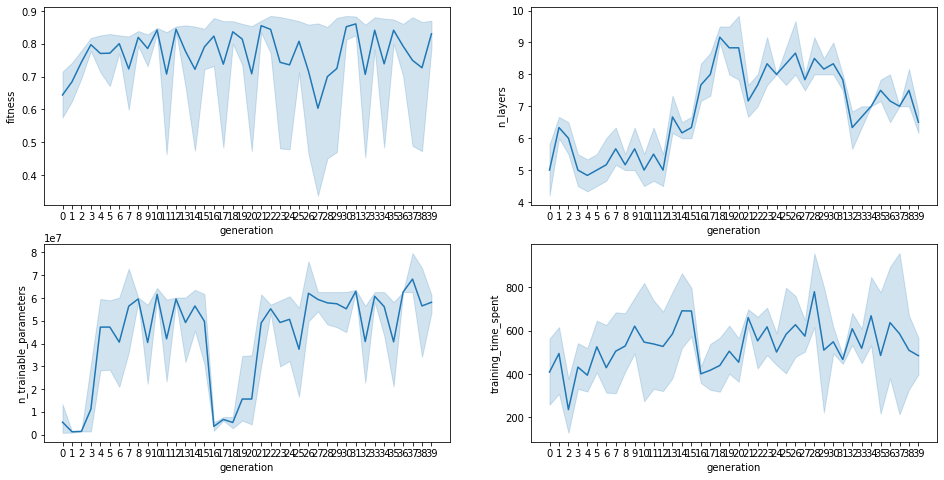

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

xticks = sorted(stats_df['generation'].unique())

sns.lineplot(x='generation', y='fitness', data=stats_df, ax=axs[0][0])
axs[0][0].set_xticks(xticks)
axs[0][0].set_xticklabels(xticks)

sns.lineplot(x='generation', y='n_layers', data=stats_df, ax=axs[0][1])
axs[0][1].set_xticks(xticks)
axs[0][1].set_xticklabels(xticks)

sns.lineplot(x='generation', y='n_trainable_parameters', data=stats_df, ax=axs[1][0])
axs[1][0].set_xticks(xticks)
axs[1][0].set_xticklabels(xticks)

sns.lineplot(x='generation', y='training_time_spent', data=stats_df, ax=axs[1][1])
axs[1][1].set_xticks(xticks)
axs[1][1].set_xticklabels(xticks)

In [ ]:
# add best overall fitness